In [ ]:
import numpy as np
import regex as re
import pandas as pd
import tensorflow as tf
import nltk

In [ ]:
def filetosentence(file_path):
    with open(file_path, 'r') as file:
        text = file.read()

    sentences = [sentence.strip() for sentence in re.split(
        r'(?<=[.!?])\s+', text) if sentence.strip()]

    return sentences

In [ ]:
file_path='/content/1661-0.txt'
sentences=filetosentence(file_path)

In [ ]:
len(sentences)

5131

In [ ]:
sentences[:10]

["THE ADVENTURES OF SHERLOCK HOLMES\n\n                               Arthur Conan Doyle\n\n\n\n                                Table of contents\n\n               A Scandal in Bohemia\n               The Red-Headed League\n               A Case of Identity\n               The Boscombe Valley Mystery\n               The Five Orange Pips\n               The Man with the Twisted Lip\n               The Adventure of the Blue Carbuncle\n               The Adventure of the Speckled Band\n               The Adventure of the Engineer's Thumb\n               The Adventure of the Noble Bachelor\n               The Adventure of the Beryl Coronet\n               The Adventure of the Copper Beeches\n\n\n\n\n\n\n\n\n\n\n                              A SCANDAL IN BOHEMIA\n\n\n\n\n\n                                Table of contents\n                                     Chapter 1\n                                     Chapter 2\n                                     Chapter 3\n\n\n\n\n\n\n\n\n\n\n\n\n\n

In [ ]:
df = pd.DataFrame(sentences, columns=['sentences'])

In [ ]:
df.head()

,sentences
0,THE ADVENTURES OF SHERLOCK HOLMES\n\n ...
1,I have seldom heard him\n mention her unde...
2,In his eyes she eclipses and\n predominate...
3,It was not that he felt any\n emotion akin...
4,"All emotions, and that one\n particularly,..."


In [ ]:
df['sentences'] = df['sentences'].str.replace('\n', ' ')
df.head()

,sentences
0,THE ADVENTURES OF SHERLOCK HOLMES ...
1,I have seldom heard him mention her under...
2,In his eyes she eclipses and predominates...
3,It was not that he felt any emotion akin ...
4,"All emotions, and that one particularly, ..."


In [ ]:
df.to_csv('prepared_data.csv')

In [ ]:
nltk.download('punkt')
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))

def preprocess_sentence(sentence):
  tokens = word_tokenize(sentence.lower())
  filtered_tokens = [token for token in tokens if token not in stop_words and token.isalnum()]
  return ' '.join(filtered_tokens)

df['preprocessed_sentences'] = df['sentences'].apply(preprocess_sentence)
df.head()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,sentences,preprocessed_sentences
0,THE ADVENTURES OF SHERLOCK HOLMES ...,adventures sherlock holmes arthur conan doyle ...
1,I have seldom heard him mention her under...,seldom heard mention name
2,In his eyes she eclipses and predominates...,eyes eclipses predominates whole sex
3,It was not that he felt any emotion akin ...,felt emotion akin love irene adler
4,"All emotions, and that one particularly, ...",emotions one particularly abhorrent cold preci...


In [ ]:
# prompt: give pos tags

import nltk
nltk.download('averaged_perceptron_tagger')

def pos_tag_sentence(sentence):
  tokens = nltk.word_tokenize(sentence)
  return nltk.pos_tag(tokens)

df['pos_tags'] = df['preprocessed_sentences'].apply(pos_tag_sentence)
df.head()


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


,sentences,preprocessed_sentences,pos_tags
0,THE ADVENTURES OF SHERLOCK HOLMES ...,adventures sherlock holmes arthur conan doyle ...,"[(adventures, NNS), (sherlock, VBP), (holmes, ..."
1,I have seldom heard him mention her under...,seldom heard mention name,"[(seldom, RB), (heard, VBN), (mention, NN), (n..."
2,In his eyes she eclipses and predominates...,eyes eclipses predominates whole sex,"[(eyes, NNS), (eclipses, VBZ), (predominates, ..."
3,It was not that he felt any emotion akin ...,felt emotion akin love irene adler,"[(felt, JJ), (emotion, NN), (akin, IN), (love,..."
4,"All emotions, and that one particularly, ...",emotions one particularly abhorrent cold preci...,"[(emotions, NNS), (one, CD), (particularly, RB..."


In [ ]:

from collections import Counter
# Word Count
total_words = sum([len(sentence.split()) for sentence in df['preprocessed_sentences']])
print(f"Total Word Count: {total_words}")

# Unique Words
all_words = []
for sentence in df['preprocessed_sentences']:
  all_words.extend(sentence.split())

unique_words = len(set(all_words))
print(f"Unique Word Count: {unique_words}")

# Average Sentence Length
average_sentence_length = total_words / len(df)
print(f"Average Sentence Length: {average_sentence_length:.2f}")


# Most Frequent Words
word_counts = Counter(all_words)
most_frequent_words = word_counts.most_common(10) # You can change the number to get more or fewer words
print(f"Most Frequent Words: {most_frequent_words}")


Total Word Count: 45581
Unique Word Count: 7544
Average Sentence Length: 8.88
Most Frequent Words: [('said', 486), ('upon', 465), ('holmes', 462), ('one', 372), ('would', 334), ('man', 303), ('could', 287), ('mr', 272), ('little', 269), ('see', 230)]


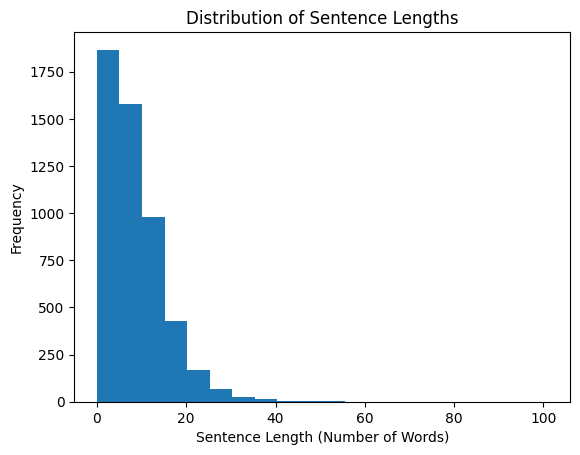

In [ ]:

import matplotlib.pyplot as plt

sentence_lengths = [len(sentence.split()) for sentence in df['preprocessed_sentences']]

plt.hist(sentence_lengths, bins=20)  # Adjust bins as needed
plt.xlabel("Sentence Length (Number of Words)")
plt.ylabel("Frequency")
plt.title("Distribution of Sentence Lengths")
plt.show()


In [ ]:
from nltk import bigrams, trigrams

# Function to extract and count n-grams
def get_ngrams(sentences, n):
  all_ngrams = []
  for sentence in sentences:
    tokens = sentence.split()
    if n == 2:
      ngrams_list = list(bigrams(tokens))
    elif n == 3:
      ngrams_list = list(trigrams(tokens))
    else:
      return []
    all_ngrams.extend(ngrams_list)
  return Counter(all_ngrams)

# Bigram Analysis
bigram_counts = get_ngrams(df['preprocessed_sentences'], 2)
most_frequent_bigrams = bigram_counts.most_common(10)
print("Most Frequent Bigrams:")
for bigram, count in most_frequent_bigrams:
  print(bigram, count)


# Trigram Analysis
trigram_counts = get_ngrams(df['preprocessed_sentences'], 3)
most_frequent_trigrams = trigram_counts.most_common(10)
print("\nMost Frequent Trigrams:")
for trigram, count in most_frequent_trigrams:
  print(trigram, count)


Most Frequent Bigrams:
('said', 'holmes') 110
('sherlock', 'holmes') 97
('could', 'see') 31
('baker', 'street') 29
('lord', 'st') 28
('young', 'lady') 24
('let', 'us') 22
('upon', 'table') 20
('miss', 'hunter') 19
('one', 'two') 16

Most Frequent Trigrams:
('said', 'sherlock', 'holmes') 8
('sherlock', 'holmes', 'sat') 7
('sir', 'george', 'burnwell') 7
('miss', 'mary', 'sutherland') 6
('watson', 'said', 'holmes') 6
('said', 'holmes', 'laughing') 6
('colonel', 'lysander', 'stark') 6
('dear', 'young', 'lady') 6
('man', 'twisted', 'lip') 4
('tottenham', 'court', 'road') 4


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np # Make sure to import numpy

max_sequence_len = max([len(seq.split()) for seq in df['preprocessed_sentences']])

# Create a Tokenizer instance
tokenizer = Tokenizer()

# Fit the tokenizer on the preprocessed sentences
tokenizer.fit_on_texts(df['preprocessed_sentences'])

# Convert sentences to sequences of integers
sequences = tokenizer.texts_to_sequences(df['preprocessed_sentences'])

# Pad the sequences
input_sequences = np.array(pad_sequences(sequences, maxlen=max_sequence_len, padding='pre'))

# Extract features and labels
X, y = input_sequences[:, :-1], input_sequences[:, -1]

# Convert labels to categorical
total_words = len(tokenizer.word_index) + 1  # Calculate total_words
y = tf.keras.utils.to_categorical(y, num_classes=total_words)

In [ ]:

model = Sequential()
model.add(Embedding(total_words, 100, input_length=max_sequence_len-1))
model.add(LSTM(150))
model.add(Dense(total_words, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:


history = model.fit(X, y, epochs=10, verbose=1, validation_split=0.2)


Epoch 1/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 31s 218ms/step - accuracy: 0.0458 - loss: 8.3934 - val_accuracy: 0.0633 - val_loss: 7.9064
Epoch 2/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 26s 205ms/step - accuracy: 0.0475 - loss: 7.0364 - val_accuracy: 0.0633 - val_loss: 8.1296
Epoch 3/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 41s 202ms/step - accuracy: 0.0529 - loss: 6.8180 - val_accuracy: 0.0555 - val_loss: 8.3796
Epoch 4/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 26s 206ms/step - accuracy: 0.0602 - loss: 6.5755 - val_accuracy: 0.0652 - val_loss: 8.6736
Epoch 5/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 34s 268ms/step - accuracy: 0.0561 - loss: 6.4524 - val_accuracy: 0.0662 - val_loss: 8.9330
Epoch 6/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 27s 207ms/step - accuracy: 0.0630 - loss: 6.3460 - val_accuracy: 0.0643 - val_loss: 9.2257
Epoch 7/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 27s 208ms/step - accuracy: 0.0580 - loss: 6.2405 - val_accuracy: 0.0574 - val_loss: 9.3720
Epoch 8/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 27s 208ms/step - accuracy: 0.0619 - loss: 6